This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?urlpath=lab/tree/notebooks/7_EM_iris_data_example/)

# GMM covariances

Demonstration of several covariances types for Gaussian mixture models (GMM).

See the [sklearn guide on GMM](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture) for more information on the estimator.

We apply GMM on the  iris dataset. This  dataset is four-dimensional, but only the first two
dimensions are shown here, and thus some points are separated in other
dimensions.
We plot the shape of the estimated clusters and the AIC/BIC criteria to estimate the optimal number of clusters.
Note that we initialize the means of the Gaussians with the means of the true classes from the training set to make
this comparison valid for several covariances types for GMM.

<!--Although GMM are often used for clustering, we can compare the obtained
clusters with the actual classes from the dataset. We initialize the means
of the Gaussians with the means of the classes from the training set to make
this comparison valid.

We plot predicted labels on both training and held out test data using a
variety of GMM covariance types on the iris dataset.
We compare GMMs with spherical, diagonal, full, and tied covariance
matrices in increasing order of performance. Although one would
expect full covariance to perform best in general, it is prone to
overfitting on small datasets and does not generalize well to held out
test data.

On the plots, train data is shown as dots, while test data is shown as
crosses. The iris dataset is four-dimensional. Only the first two
dimensions are shown here, and thus some points are separated in other
dimensions.-->




This is a simplified version of the code of this [sklearn example](https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py).

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

%matplotlib inline

# Iris data - EM clustering
Note that while labels are available for this data set, they will not be used in GMM identification.  

In [2]:
iris = datasets.load_iris()

X_train = iris.data
y_train = iris.target

n_classes = len(
    np.unique(y_train)
)  # list the unique elements in y_train : nb of different labels

## GMM model estimation

In [3]:
# Try GMMs using full covariance (no constraints imposed on cov)

cv_type = "full"
#cv_type = "tied"
#cv_type = "diagonal"
#cv_type = "spherical"
estimator = GaussianMixture(
    n_components=n_classes, covariance_type=cv_type, max_iter=50, random_state=0
)

# !! 
Lines below initialize with centers of mass of each cluster, as labels are known...
Usually, 3 different centers are required, chosen at random. It this latter case, the correct
    clusters are extracted, up to some circular permutation on the labels

In [4]:
# Since we have class labels for the training data, we can
# initialize the GMM parameters in a supervised manner.
estimator.means_init = np.array(
    [X_train[y_train == i].mean(axis=0) for i in range(n_classes)]
)

estimator.fit(X_train)

GaussianMixture(max_iter=50,
                means_init=array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]]),
                n_components=3, random_state=0)

In [5]:
print(estimator.covariances_)
# print(estimator.covariances_[1][1:3,1:3])

[[[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.27555846 0.09657992 0.18562554 0.05486324]
  [0.09657992 0.09253766 0.0910186  0.04299954]
  [0.18562554 0.0910186  0.20266592 0.06184329]
  [0.05486324 0.04299954 0.06184329 0.03239585]]

 [[0.38754333 0.09223946 0.30243691 0.06078315]
  [0.09223946 0.11041919 0.08379036 0.05570474]
  [0.30243691 0.08379036 0.32566732 0.07253285]
  [0.06078315 0.05570474 0.07253285 0.08471718]]]


In [6]:
print(estimator.means_)
#estimator.means_[0, 0::2]

[[5.006      3.428      1.462      0.246     ]
 [5.91743867 2.77807834 4.20602834 1.29872958]
 [6.54663103 2.94958567 5.48422408 1.98765097]]


## Ploting results : 
choose the  axis pair to visualize 

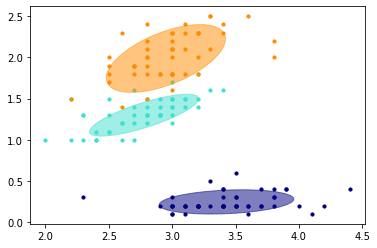

In [7]:
# for K clusters, specify K colors  (here K=3)
colors = ["navy", "turquoise", "darkorange"]

fig, ax = plt.subplots(subplot_kw={"aspect": "equal"})

axes = ["x2", "x4"]
for n, color in enumerate(colors):
    # defines ellipses parameters, using eigen-axes
    data = iris.data[iris.target == n]
    if axes == ["x1", "x2"]:
        covariances = estimator.covariances_[n][0:2, 0:2]
        plt.scatter(
            data[:, 0], data[:, 1], s=10, color=color, label=iris.target_names[n]
        )
        Est_means = estimator.means_[n, 0:2]
    elif axes == ["x1", "x3"]:
        covariances = estimator.covariances_[n][0::2, 0::2]
        plt.scatter(
            data[:, 0], data[:, 2], s=10, color=color, label=iris.target_names[n]
        )
        Est_means = estimator.means_[n, 0::2]
    elif axes == ["x1", "x4"]:
        covariances = estimator.covariances_[n][0::3, 0::3]
        plt.scatter(
            data[:, 0], data[:, 3], s=10, color=color, label=iris.target_names[n]
        )
        Est_means = estimator.means_[n, 0::3]
    elif axes == ["x2", "x3"]:
        covariances = estimator.covariances_[n][1:3, 1:3]
        plt.scatter(
            data[:, 1], data[:, 2], s=10, color=color, label=iris.target_names[n]
        )
        Est_means = estimator.means_[n, 1:3]
    elif axes == ["x2", "x4"]:
        covariances = estimator.covariances_[n][1::2, 1::2]
        plt.scatter(
            data[:, 1], data[:, 3], s=10, color=color, label=iris.target_names[n]
        )
        Est_means = estimator.means_[n, 1::2]
    elif axes == ["x3", "x4"]:
        covariances = estimator.covariances_[n][2:, 2:]
        plt.scatter(
            data[:, 2], data[:, 3], s=10, color=color, label=iris.target_names[n]
        )
        Est_means = estimator.means_[n, 2:]

    v, w = np.linalg.eigh(covariances)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    ell = mpl.patches.Ellipse(Est_means, v[0], v[1], 180 + angle, color=color)
    # dplot the ellipses
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)
    ax.set_aspect("auto")


# for visualizing axe1 vs axe2, use "covariances = estimator.covariances_[n][0:2, 0:2]"
# for visualizing axe1 vs axe3, use "covariances = estimator.covariances_[n][0::2, 0::2]"
# for visualizing axe1 vs axe4, use "covariances = estimator.covariances_[n][0::3, 0::3]"
# for visualizing axe2 vs axe3, use "covariances = estimator.covariances_[n][1:3, 1:3]"
# for visualizing axe2 vs axe4, use "covariances = estimator.covariances_[n][1::2, 1::2]"
# for visualizing axe3 vs axe4, use "covariances = estimator.covariances_[n][2:, 2:]"

bic = [574.01783272 580.86127847 629.83784882 674.43878158 726.14923081]
aic = [486.70940919 448.39332553 452.21036647 451.65176982 458.20268963]


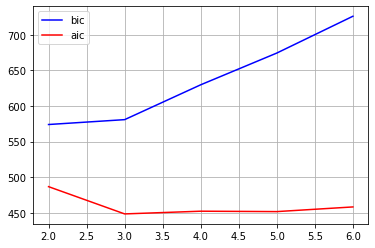

In [9]:
import itertools
from scipy import linalg
from sklearn import mixture

lowest_bic = np.infty
bic = []
aic = []
n_components_range = range(2, 7)


for n_comp in n_components_range:
    # Fit a Gaussian mixture with EM
    gmm = GaussianMixture(
        n_components=n_comp, covariance_type=cv_type, max_iter=1000, random_state=1
    )
    gmm.fit(X_train)
    # bic.append(gmm.aic(X_train))
    bic.append(gmm.bic(X_train))
    aic.append(gmm.aic(X_train))
bic = np.array(bic)
aic = np.array(aic)

# Plot the BIC scores

plt.plot(np.linspace(2, 6, 5), bic, "b", label="bic")
plt.plot(np.linspace(2, 6, 5), aic, "r", label="aic")
plt.legend()
plt.grid('On')
print("bic = {}".format(bic))
print("aic = {}".format(aic))

### (Optional) Exercise 12
- Comment on the number of clusters estimated with the BIC and AIC criteria respectively.
- Change the shape of the clusters by setting some constraints on the GMM covariances (`tied` for a covariance common to all clusters, `diagonal`, or `spherical` for a covariance proportional to the identity matrix, see cell 3) and re-run the estimation/visualization/model selection cells. Comment on the cluster shapes and the AIC/BIC criterion obtained.